<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
plt.style.use('seaborn-white')

# Newton's Method

<IPython.core.display.Javascript object>


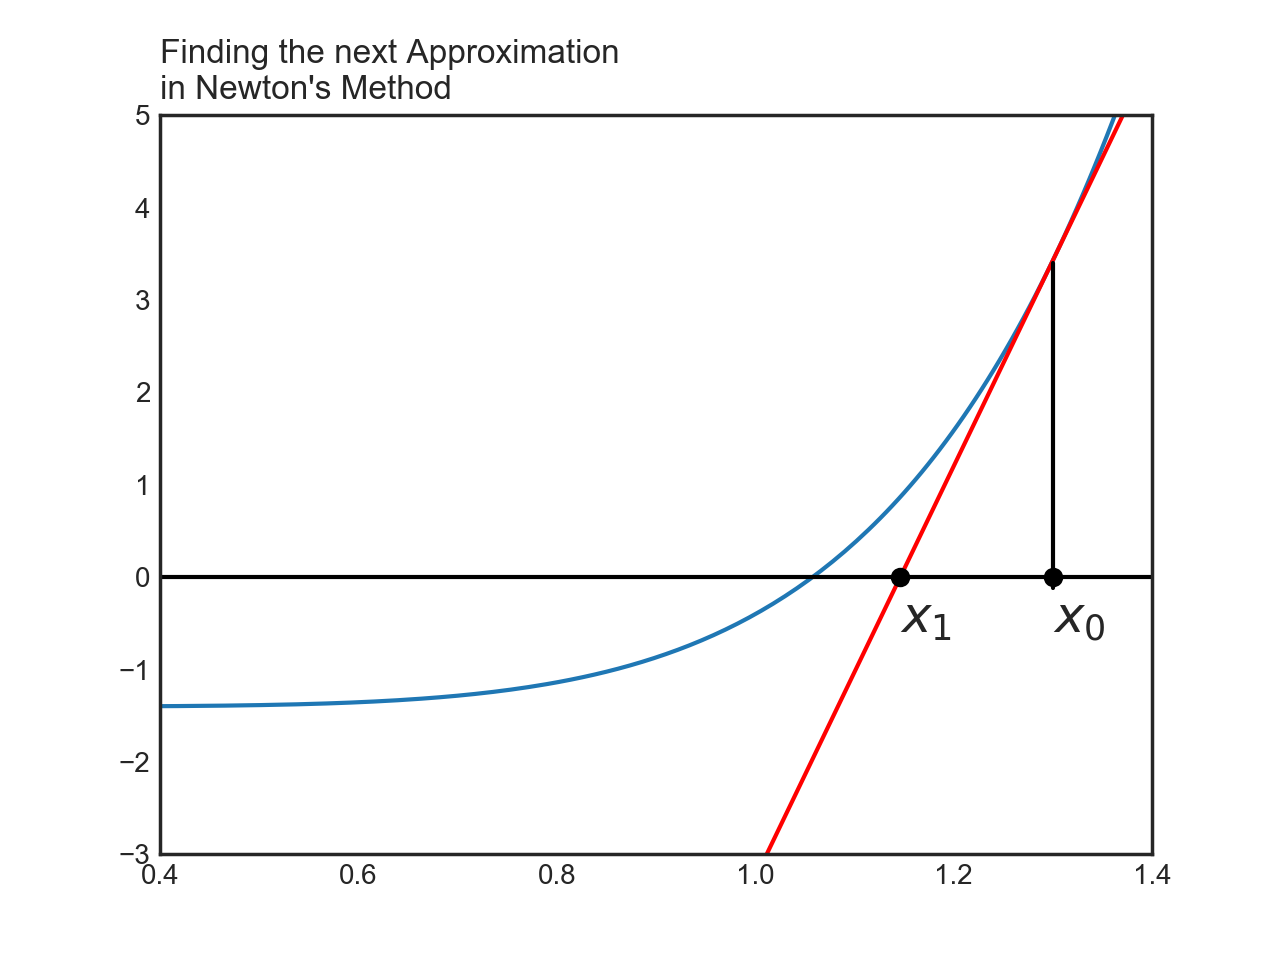

In [3]:
def f(x):
    return x**6 - 1.4

def df(a):
    return (f(a + 0.00001) - f(a))/0.00001

def tan_line(a):
    return df(a)*(x - a) + f(a)

def n(a):
    return a - f(a)/df(a)

x = np.linspace(-3,3,1000)
ax = plt.figure()
plt.plot(x, f(x))
plt.plot(x, tan_line(1.3), color = 'red')

plt.xlim(0.4, 1.4)
plt.ylim(-3,5)
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.axvline(1.3, 0.36, 0.8, color = 'black')
plt.text(1.3, -0.6, "$x_0$", fontsize = 18)


plt.plot(1.3, 0, 'o', color = 'black')
plt.plot(n(1.3), 0, 'o', color = 'black')
plt.text(n(1.3), -0.6, "$x_1$", fontsize = 18)
plt.title("Finding the next Approximation \nin Newton's Method", loc = 'left')
plt.savefig('images/newton2.png')

**PROBLEM**

1. Find a formula for $x_1$ in terms of $x_0$.

2. Find a formula for $x_2$ in terms of $x_0$.

3. Find a general formula for $x_{n+1}$ in terms of $x_n$.

![](images/newton2.png)

Tangent line at $x_0$ has goes through the point $(x_0, f(x_0)$ with slope $f'(x_0)$.  From here, we can use our point slope form of a linear function and write:

$$y - y_0 = m(x-x_0)$$

as

$$y - f(x_0) = f'(x_0)(x - x_0)$$

or 

$$y = f'(x_0)(x - x_0) + f(x_0)$$

The value for $x_1$ is when this line crosses the $x$-axis, or when $y = 0$.  Hence

$$0 = f'(x_0)(x_1 - x_0) + f(x_0)$$

or after solving for $x_1$ we have

$$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$

**Problem**

1. Graph the function $f(x) = x^3 -4x^2 -1$, note the one solution.

2. Use Newton's Method with $x_0=5$ to find $x_1$ and $x_2$.

3. Use the computer to find the $x_8$.

4. Repeat with $x_0 = 2$, what do you notice?

5. Now try with $x_0 = 0$.  What's happening?



In [4]:
#define our function f
def f(x):
    return x**3 - 4*x**2 - 1

#define a derivative function using h = 0.0001
def df(x):
    return (f(x + 0.0001) - f(x))/0.0001

In [5]:
#define x1 using the formula developed above
x1 = 5 - f(5)/df(5)
print("Our first approximation x1 = ", x1)

Our first approximation x1 =  4.314307264821802


In [6]:
#repeat procedure above for our second approximation
x2 = x1 - f(x1)/df(x1)
print("Second approximation is: ", x2)

Second approximation is:  4.0868741600614715


In [7]:
approximations = [5]
for i in range(10):
    next = approximations[i] - f(approximations[i])/df(approximations[i])
    print("Our ", i, "approximation is ", next)
    approximations.append(next)

Our  0 approximation is  4.314307264821802
Our  1 approximation is  4.0868741600614715
Our  2 approximation is  4.060973545033629
Our  3 approximation is  4.060647094636585
Our  4 approximation is  4.060647027557377
Our  5 approximation is  4.060647027554143
Our  6 approximation is  4.060647027554142
Our  7 approximation is  4.060647027554142
Our  8 approximation is  4.060647027554142
Our  9 approximation is  4.060647027554142


In [8]:
approximations[8]

4.060647027554142

<IPython.core.display.Javascript object>


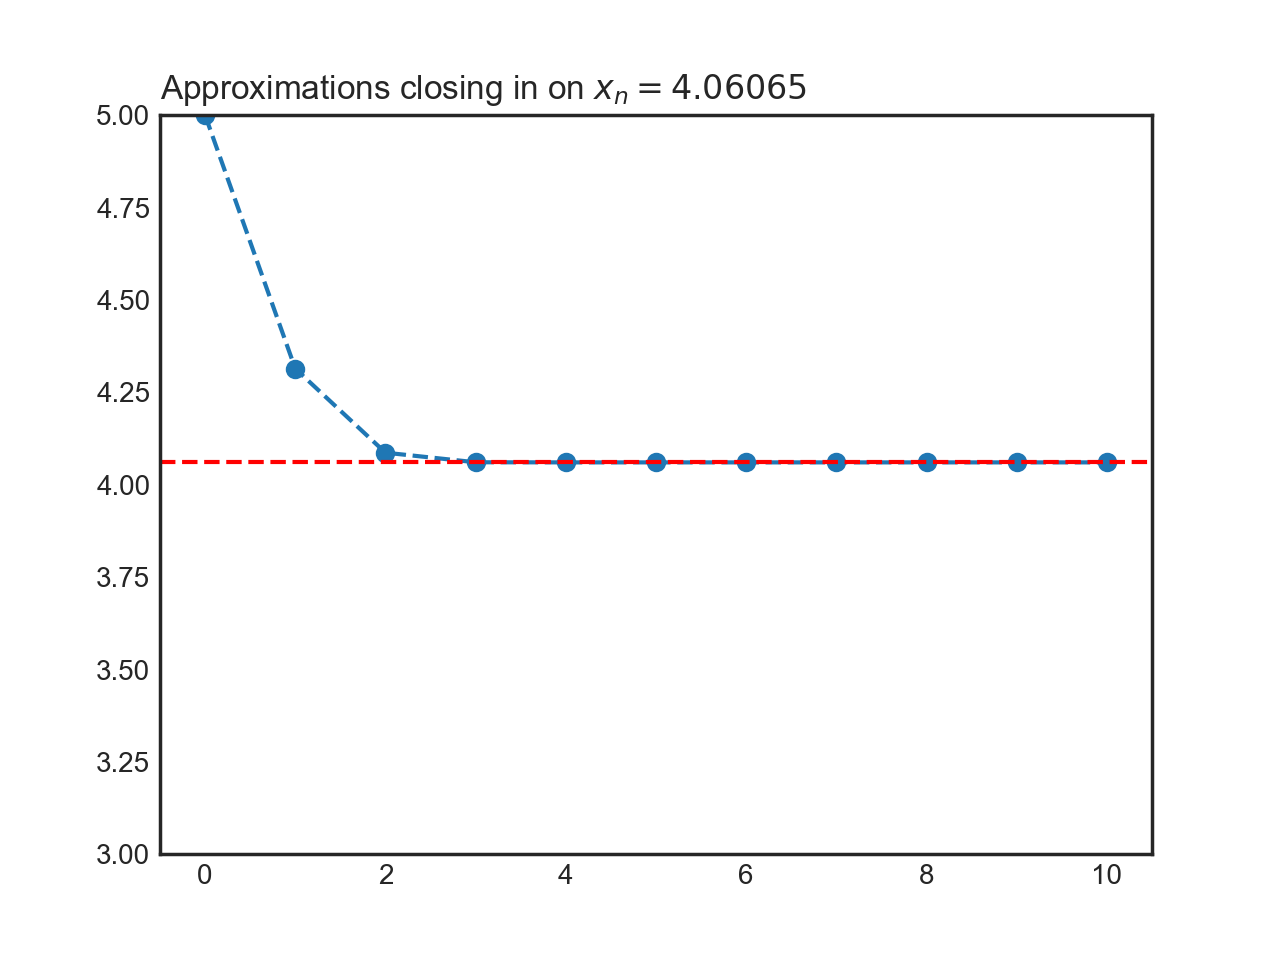

Text(0,1,'Approximations closing in on $x_n = 4.06065$')

In [9]:
plt.figure()
plt.plot(approximations, '--o')
plt.ylim(3, 5)
plt.axhline(approximations[-1], linestyle = '--', color = 'red')
plt.title("Approximations closing in on $x_n = 4.06065$", loc = 'left')

<div class="alert alert-success" role="alert">
  <strong>So What?!</strong> This should mean that our original function equals zero when $x = 4.06065$.
</div>

In [10]:
f(4.06065)

5.0476324631176794e-05

In [11]:
#repeating our process above starting with x0 = 2
approx2 = [2.0]
for i in range(10):
    next = approx2[i] - f(approx2[i])/df(approx2[i])
    approx2.append(next)
    
approx2

[2.0,
 -0.2501125112459115,
 0.3284143953117059,
 -0.277476731512067,
 0.2650410986508679,
 -0.395916521479287,
 0.06848549779683089,
 -1.8380174545550845,
 -1.0037100235361796,
 -0.457084983177515,
 -0.00617702418119781]

<IPython.core.display.Javascript object>


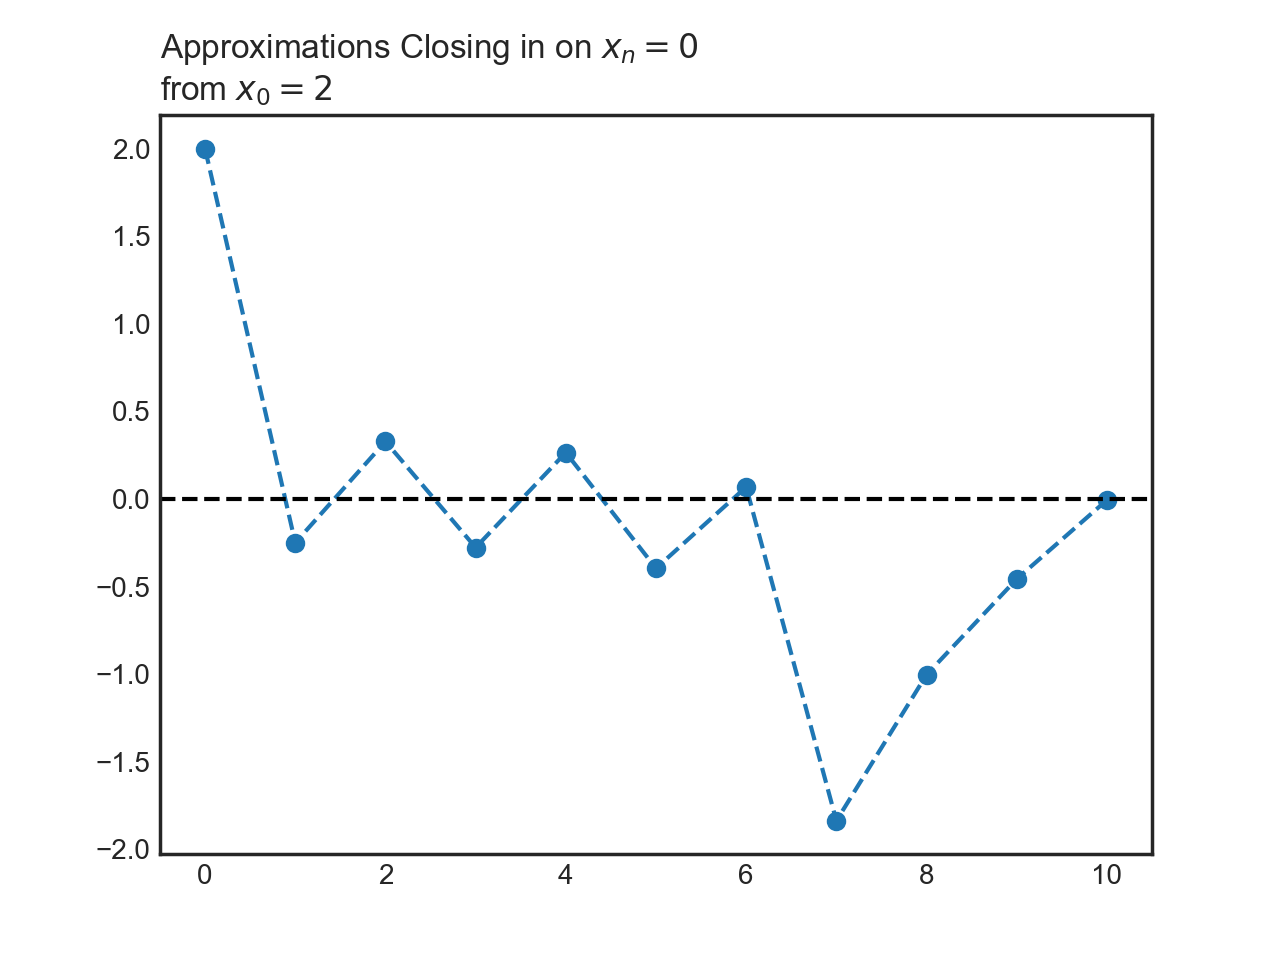

Text(0,1,'Approximations Closing in on $x_n = 0$ \nfrom $x_0 = 2$')

In [12]:
plt.figure()
plt.plot(approx2, '--o')
plt.axhline(color = 'black', linestyle = '--')
plt.title("Approximations Closing in on $x_n = 0$ \nfrom $x_0 = 2$", loc = 'left')

In [12]:
#repeating our process above starting with x0 = 2
approx3 = [0.0]
for i in range(10):
    next = approx3[i] - f(approx3[i])/df(approx3[i])
    approx3.append(next)
    
approx3

[0.0,
 -2500.0625084350586,
 -1666.2643362734148,
 -1110.3991233297015,
 -739.8226689769101,
 -492.7722304250899,
 -328.07273331465905,
 -218.27425810421983,
 -145.0770516348452,
 -96.28156299561368,
 -63.75517373413263]

<IPython.core.display.Javascript object>


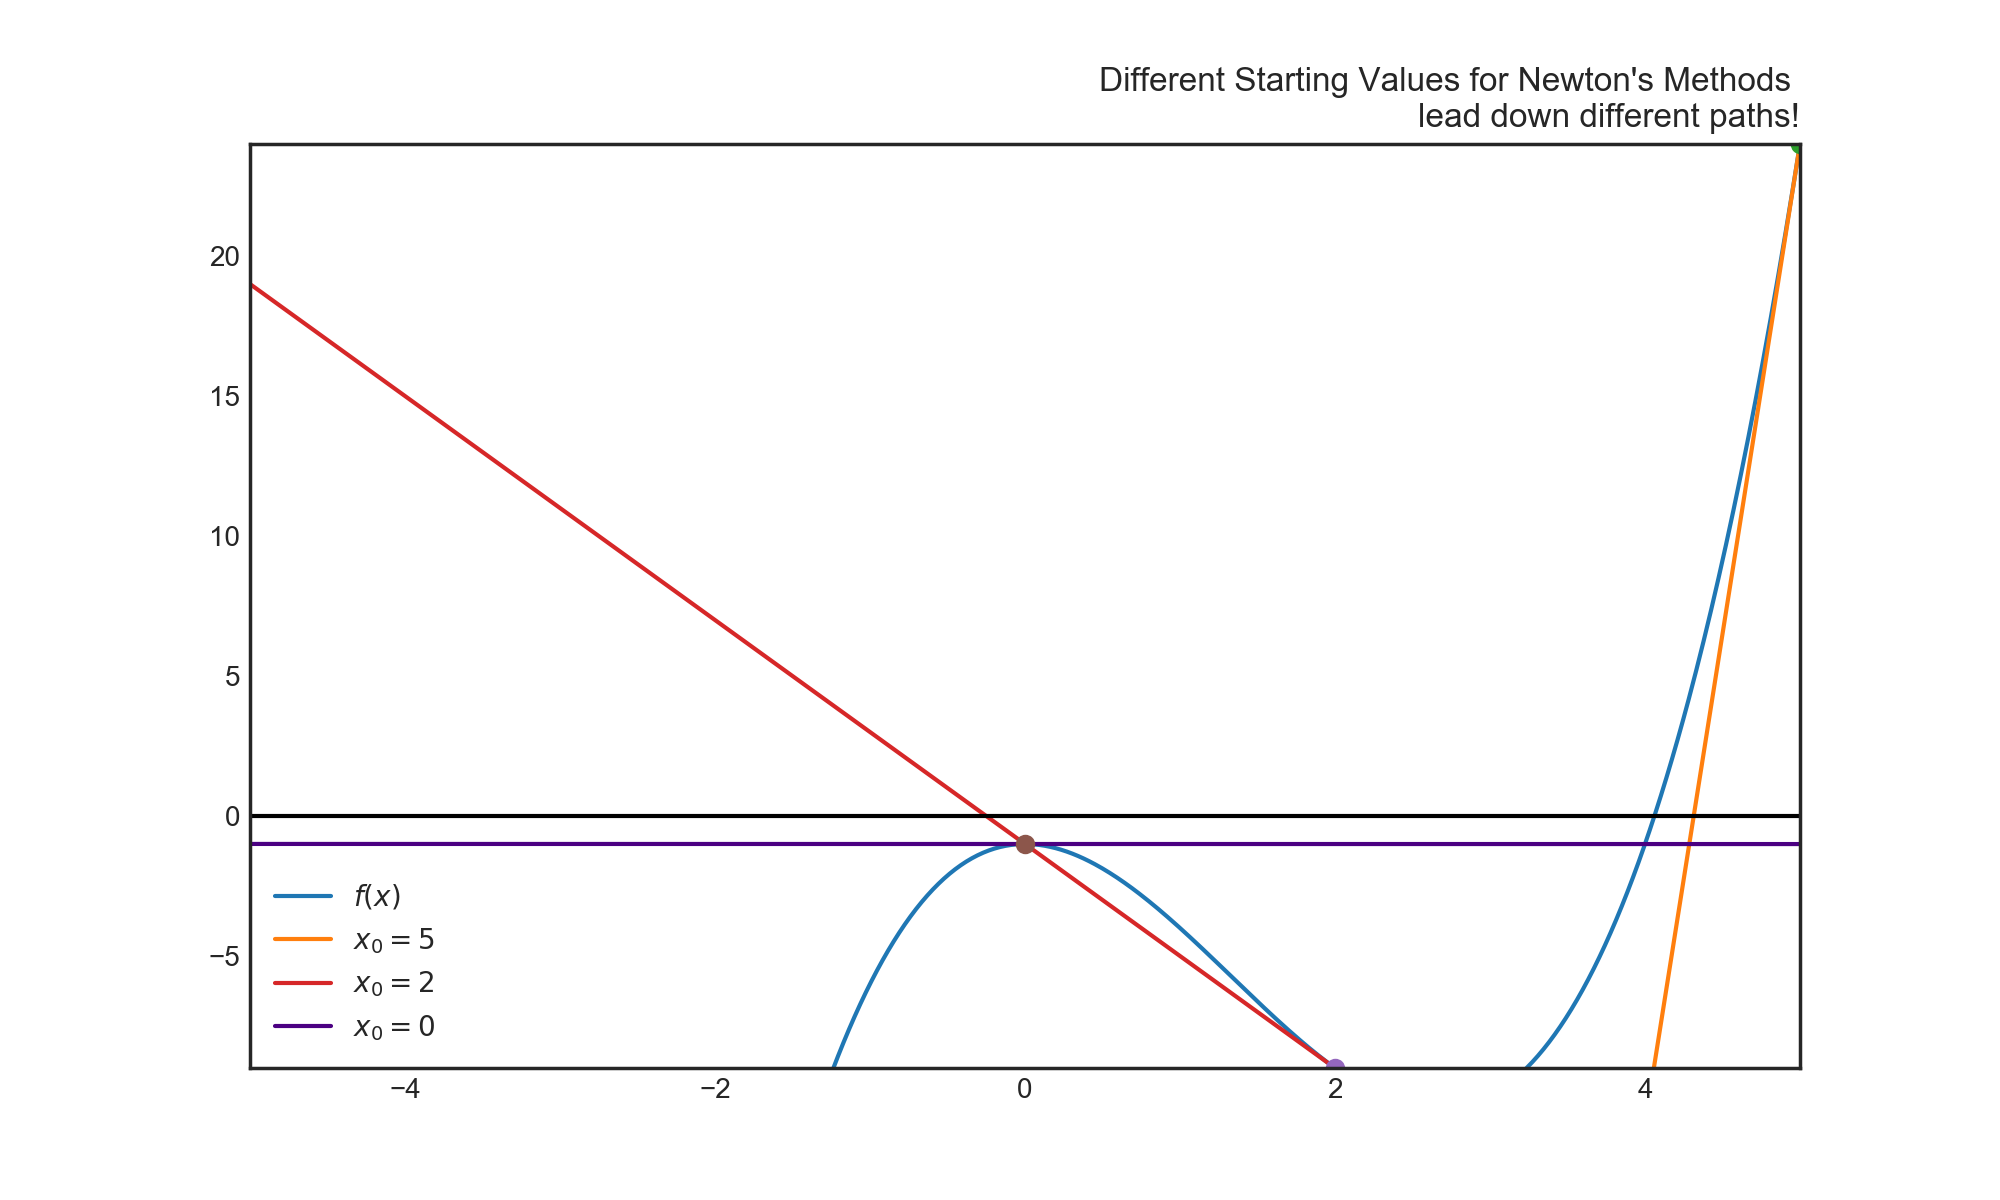

Text(1,1,"Different Starting Values for Newton's Methods \nlead down different paths!")

In [13]:
x = np.linspace(-6,6,1000)
plt.figure(figsize = (10, 6))
plt.plot(x, f(x), label = "$f(x)$")

plt.plot(x, tan_line(5), label = "$x_0 = 5$")
plt.plot(5, f(5), 'o')


plt.plot(x, tan_line(2), label = "$x_0 = 2$")
plt.plot(2, f(2), 'o')

plt.plot(x, tan_line(0), color = 'indigo', label = "$x_0 = 0$")
plt.plot(0, f(0), 'o')

plt.ylim(f(2),f(5))
plt.xlim(-5,5)
plt.axhline(color = 'black')
plt.legend(loc = 'best')
plt.title("Different Starting Values for Newton's Methods \nlead down different paths!", loc = 'right')

In [14]:
from ipywidgets import interact

#define a function that takes in x0 and 
#n(the number of iterations) for newton's method

def newton(x0, n):
    apx = [x0]
    for i in range( n):
        next = apx[i] - f(apx[i])/df(apx[i])
        apx.append(next)
    print(apx)
    

#creates sliders for approximations to change x0 and n
interact(newton, x0=(-2,2,0.1), n=(0,10,1))


A Jupyter Widget

<function __main__.newton>

In [15]:
#modify the function above to include a plot
def newton(x0, n):
    apx = [x0]
    for i in range( n):
        next = apx[i] - f(apx[i])/df(apx[i])
        apx.append(next)
    print(apx[-5:])
    plt.figure(figsize = (10, 6))
    plt.subplot(121)
    plt.plot(apx, '--o')
    plt.ylim(-5,6)
    plt.axhline(color = 'black')
    plt.title("Approximations for zero \nby Newton's method", loc = 'left')
    plt.subplot(122)
    plt.plot(x, f(x))
    plt.plot(x0, f(x0), 'o', color = 'black')
    plt.plot(x, tan_line(x0))
    plt.axhline(color = 'black')
    plt.ylim(f(2.6),f(6))
    plt.title("Plot of $f$ and the tangent at $x_0$", loc = 'left')
   

interact(newton, x0=(-2,6,0.1), n=(0,10,1))

A Jupyter Widget

<function __main__.newton>

**Problem**

1. Recall the distance formula 

$$D = \sqrt{(x_2 - x_1)^2  + (y_2 - y_1)^2}$$

Write an equation that gives the distance from any point on the curve $y = 1/x$ to the point $(1,0)$.

2. Minimize this distance using Newton's method to find critical points.

**Problem**

Consider $f(x) = x^3 - x$.  

a. Argue that if $x_0 > \frac{1}{\sqrt{3}}$, then Newton's Method will converge to the solution 1.  Therefore, by symmetry, if $x_0 < \frac{-1}{\sqrt{3}}$, Newton's Method will converge to the solution $-1$. 

b. What happens when $x_0 = 1/\sqrt{3}$?

c. Demonstrate Algebraically and with the computer that if we start with $x_0 = 1/\sqrt{5}$, we do not converge to a solution.

d. Some interesting behavior occurs between $1/\sqrt{5} < x_0 < 1/\sqrt{3}$.  Fill in the following table and discuss the consequences of your observation.

<table style="width:100%">
  <tr>
    <th>$x_0$</th>
    <th>Solution Found</th> 
  </tr>
  <tr>
    <td>0.577</td>
    <td></td> 
  </tr>
  <tr>
    <td>0.578</td>
    <td></td> 
  </tr>
  <tr>
    <td>0.460</td>
    <td></td> 
  </tr>
  <tr>
    <td>0.466</td>
    <td></td> 
  </tr>
  <tr>
    <td>0.44722</td>
    <td></td> 
  </tr>
  <tr>
    <td>0.44723</td>
    <td></td> 
  </tr>
</table>

In [37]:
def df(x):
    dx = 0.000001
    return (f(x + dx) - f(x))/dx

def f(x):
    return x**3 - x

In [38]:
def N(x):
    return x - f(x)/df(x)

In [39]:
N(1)

1.0

In [40]:
l = [1/np.sqrt(3)]
for i in range(8):
    z = N(l[i])
    l.append(z)

In [41]:
l

[0.57735026918962584,
 222221.75609390991,
 148149.07405719586,
 98766.466043583889,
 65844.091950192,
 43895.920678771174,
 29263.96470188459,
 19509.316399357514,
 13006.214032287608]